In [59]:
from cProfile import label
import matplotlib.pyplot as plt
import csv
import numpy as np
import pandas as pd
from sympy import *
import scipy as sp
import sys
sys.path.append('..')

In [60]:
df = pd.read_csv("in/ee.txt", sep="\s+",skiprows=11, header=None, decimal=",")
df = df.drop(range(257,len(df)))

In [61]:
df = df.drop(df.iloc[:, 5:20],axis = 1)
df.columns = ["mm:ss", "obciazenie", "VO2", "VO2/kg", "VCO2"]

In [62]:
def get_sec(string):
    m, s = string.split(':')
    return (60*int(m) + int(s))
df["time"] = df["mm:ss"].apply(get_sec)

In [63]:
#nazwy do zmiany + ang
df_spoczynek = df.iloc[3:41].copy() #ten slice do zmiany, bo trzeba sprawdzic w ktorym dokladnie momencie nastapila zmiana ruchu
df_machanie = df.iloc[41:86].copy() # tak samo jak wyzej
df_jazda = df.iloc[86:200].copy()
df_luzne = df.iloc[200:len(df)].copy()

df_array = [df_spoczynek, df_machanie, df_jazda, df_luzne]

for dataframe in df_array:
    dataframe.reset_index(inplace=True)

In [64]:
# def delta_t(time):
#     df["delta_t"][0] = 0
#     for i in range(1, len(df)):
        # df["delta_t"][i] = df["time"][i+1] - df["time"][i]
def dt(time):
    deltat = []
    deltat.append(0)
    for i in range(0, len(time)-1):
        deltat.append( time[i+1] - time[i] )
    return deltat

# def 

In [65]:
for dataframe in df_array:
    dataframe["delta_t in min"] = dt(dataframe["time"])
    dataframe["delta_t in min"] = dataframe["delta_t in min"]/60
    dataframe["whole V02 in specified time"] = dataframe["VO2"]*dataframe["delta_t in min"]
    dataframe["whole VC02 in specified time"] = dataframe["VCO2"]*dataframe["delta_t in min"]


print(df_spoczynek.to_string())

    index mm:ss  obciazenie   VO2  VO2/kg  VCO2  time  delta_t in min  whole V02 in specified time  whole VC02 in specified time
0       3  0:00           0  0.22     3.9  0.19     0        0.000000                     0.000000                      0.000000
1       4  0:04           0  0.27     4.8  0.23     4        0.066667                     0.018000                      0.015333
2       5  0:09           0  0.25     4.4  0.21     9        0.083333                     0.020833                      0.017500
3       6  0:13           0  0.26     4.5  0.22    13        0.066667                     0.017333                      0.014667
4       7  0:17           0  0.25     4.4  0.21    17        0.066667                     0.016667                      0.014000
5       8  0:22           0  0.22     3.9  0.19    22        0.083333                     0.018333                      0.015833
6       9  0:27           0  0.26     4.5  0.21    27        0.083333                     0.02166

In [66]:

df["time"].iloc[3:200] = df["time"].iloc[3:200] + df["time"].iloc[2]
df["time"].iloc[200:] = df["time"].iloc[200:] + df["time"].iloc[199]

df["min"] = df["time"]/60
df["whole V02"] = df["VO2"]*df["min"]
# print(df.to_string())

/usr/lib64/python3.11/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


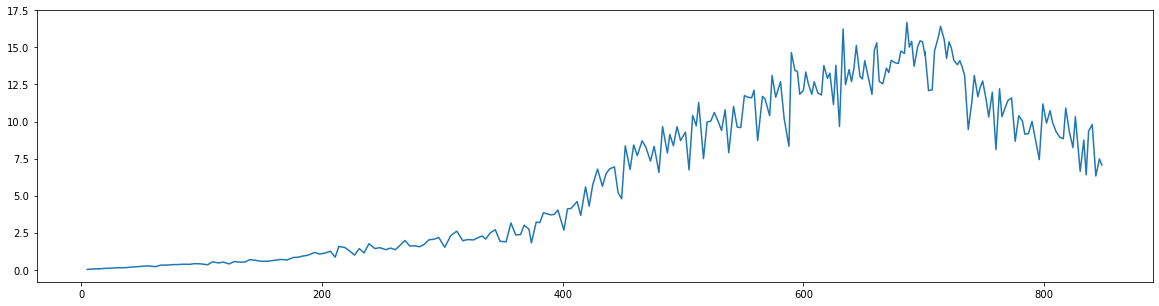

In [67]:
fig, ax = plt.subplots(figsize=(20, 5))
# ax.plot(df["time"], df["VO2"], label="VO2")
ax.plot(df["time"], df["whole V02"], label="VO2")
# ax.plot(df["time"], df["VCO2"], label="VCO2")

plt.show()

determining how much water could we boil from 20 to 100 degrees Celsius

In [ ]:
energy = 1 #some random number # in jules
shc_water = 4189.9 # specific heat capacity of water in normal conditions
Tmax = 100 # celsius
Tmin = 20 # celsius

mass_of_water = energy/(shc_water*(Tmax-Tmin))